In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
Img_dir = "/content/drive/My Drive/IIITNR_PROJECT/dataset/Train/Red soil/Copy of images125.jpg"

In [4]:
from google.colab.patches import cv2_imshow

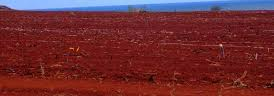

In [5]:
import cv2
import numpy as np

def crop_soil(image_path, output_path):
    # Step 1: Read the image
    image = cv2.imread(image_path)

    # Step 2: Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 3: Apply thresholding
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

    # Step 4: Find contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Step 5: Get the largest contour (assuming it is the soil region)
    largest_contour = max(contours, key=cv2.contourArea)

    # Step 6: Get the bounding box of the largest contour
    x, y, w, h = cv2.boundingRect(largest_contour)

    # Step 7: Crop the image using the bounding box
    cropped_image = image[y:y+h, x:x+w]
    cv2_imshow( cropped_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # Step 8: Save the cropped image
    cv2.imwrite(output_path, cropped_image)

# Example usage
crop_soil(Img_dir, "/content/drive/My Drive/IIITNR_PROJECT/crop_soil_img.jpg")


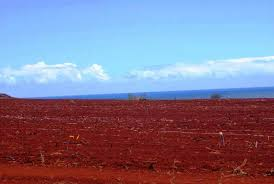

In [6]:
#step1
##taking image and displaying it
image = cv2.imread(Img_dir)
from google.colab.patches import cv2_imshow # Import the cv2_imshow function
cv2_imshow( image) # Use cv2_imshow instead of cv2.imshow
cv2.waitKey(0)
cv2.destroyAllWindows()

array([[164, 164, 164, ..., 174, 176, 176],
       [164, 164, 164, ..., 174, 176, 176],
       [164, 164, 164, ..., 175, 177, 177],
       ...,
       [ 45,  48,  55, ...,  58,  54,  54],
       [ 50,  51,  51, ...,  49,  54,  53],
       [ 57,  62,  65, ...,  73,  58,  58]], dtype=uint8)
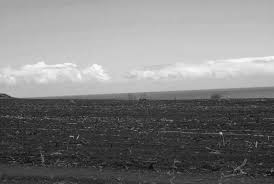

In [7]:
#step 2
#converting rbg image to grey scale image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray

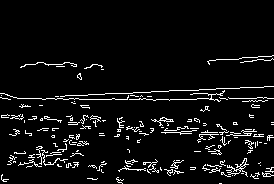

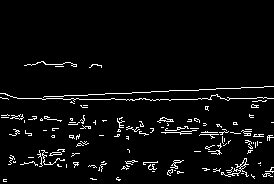

In [8]:
##step 3
#difference between both
#step 3.1 ---Applying edge detection
edges_rgb = cv2.Canny(image, 100, 200)
edges_gray = cv2.Canny(gray, 100, 200)
cv2_imshow( edges_rgb)
print("\n")
cv2_imshow( edges_gray)


In [9]:
##step 3
#difference between both
#step 3.2 ---Calculate noise (e.g., using standard deviation of the Laplacian)
noise_rgb = cv2.Laplacian(image, cv2.CV_64F).var()
noise_gray = cv2.Laplacian(gray, cv2.CV_64F).var()
noise_rgb , noise_gray

(565.7528431624332, 562.6632436094247)

In [10]:
import matplotlib.pyplot as plt

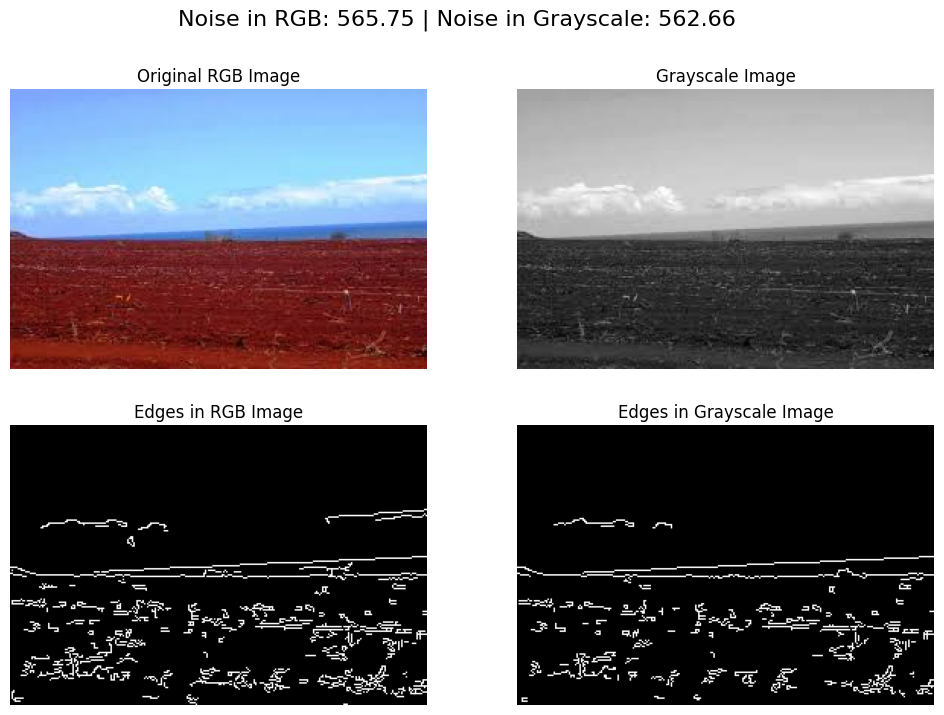

In [11]:
# Step 4: Visual Comparison
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original RGB Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(edges_rgb, cmap='gray')
plt.title('Edges in RGB Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(edges_gray, cmap='gray')
plt.title('Edges in Grayscale Image')
plt.axis('off')

plt.suptitle(f'Noise in RGB: {noise_rgb:.2f} | Noise in Grayscale: {noise_gray:.2f}', fontsize=16)
plt.show()

In [12]:
from skimage.feature import graycomatrix, graycoprops

In [13]:
##glcm analysis

def glcm_analysis(image, title):
        distances = [1]  # pixel pair distance
        angles = [0]  # angles in radians
        glcm = graycomatrix(image, distances, angles, 256, symmetric=True, normed=True)

        contrast = graycoprops(glcm, 'contrast')[0, 0]
        dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
        homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
        energy = graycoprops(glcm, 'energy')[0, 0]
        correlation = graycoprops(glcm, 'correlation')[0, 0]

        print(f'{title} Texture Analysis:')
        print(f'Contrast: {contrast:.2f}')
        print(f'Dissimilarity: {dissimilarity:.2f}')
        print(f'Homogeneity: {homogeneity:.2f}')
        print(f'Energy: {energy:.2f}')
        print(f'Correlation: {correlation:.2f}')
        print('')

In [14]:

glcm_analysis(gray, 'Grayscale Image')

Grayscale Image Texture Analysis:
Contrast: 51.70
Dissimilarity: 3.58
Homogeneity: 0.52
Energy: 0.06
Correlation: 0.99



In [15]:
##NOISE REDUCTION TECHNIQUE
##MEDIAN FILTERING

In [16]:
from scipy.ndimage import median_filter

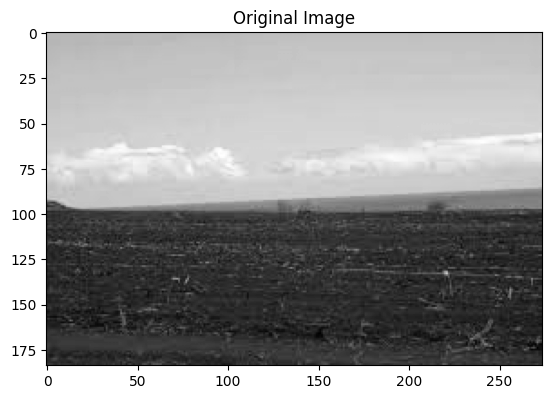

In [17]:
##Loding the image
# If the image is colored (3 channels), convert it to grayscale for simplicity
if len(image.shape) == 3:
    image = np.mean(image, axis=2)

# Display the original image
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()

In [18]:
#Implement the median filter function
def median_filter_manual(image, filter_size):
    # Get the dimensions of the image
    m, n = image.shape

    # Create an output image to store the results
    filtered_image = np.zeros((m, n), dtype=np.uint8)

    # Define the margin
    margin = filter_size // 2

    # Pad the image to handle the borders
    padded_image = np.pad(image, margin, mode='constant', constant_values=0)

    # Apply the median filter
    for i in range(m):
        for j in range(n):
            # Extract the window
            window = padded_image[i:i+filter_size, j:j+filter_size]
            # Compute the median of the window
            median_value = np.median(window)
            # Assign the median value to the filtered image
            filtered_image[i, j] = median_value

    return filtered_image


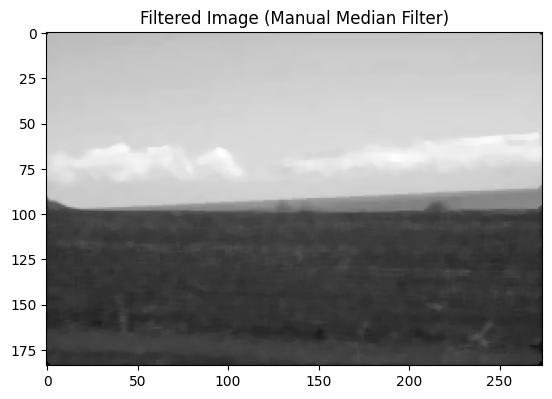

In [19]:
filter_size = 5  # You can change the filter size to 5, 7, etc.
filtered_image = median_filter_manual(image, filter_size)

# Display the filtered image
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image (Manual Median Filter)')
plt.show()

In [20]:
noise_gray_median_filtered = cv2.Laplacian(filtered_image, cv2.CV_64F).var()
noise_gray_median_filtered

78.27717872189139

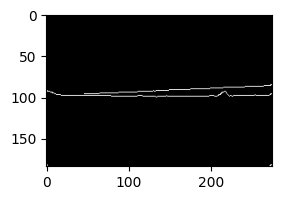

In [21]:
edges_filtered = cv2.Canny(filtered_image, 100, 200)

plt.subplot(2, 2, 4)
plt.imshow(edges_filtered, cmap='gray')

Non-Local Means Denoising

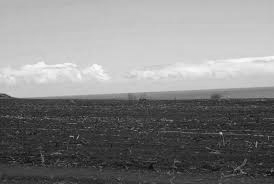

In [22]:
cv2_imshow( image)

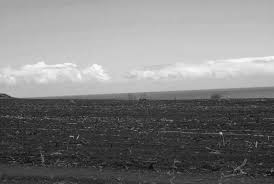

In [23]:
cv2_imshow( gray)

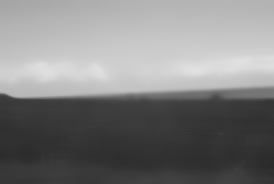

In [24]:
denoised_image = cv2.fastNlMeansDenoising(gray, None, 30, 7, 21)
cv2_imshow( denoised_image)

APPLYING VARIOUS DENOISE METHODS

Original Image:


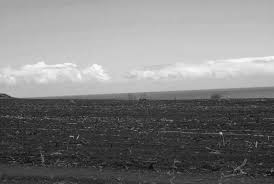

Gaussian Blur: PSNR=32.23, SSIM=0.84


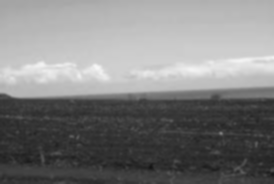

Median Filtering: PSNR=30.54, SSIM=0.76


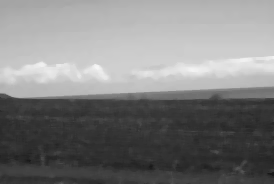

Bilateral Filtering: PSNR=30.24, SSIM=0.74


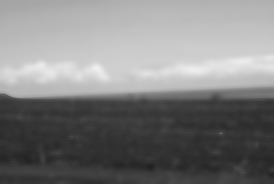

Non-Local Means Denoising: PSNR=29.12, SSIM=0.68


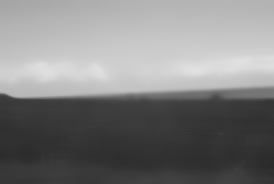

In [25]:
import cv2
import numpy as np
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

# Function to calculate and print noise metrics
def print_noise_metrics(original, processed, method_name):
    psnr = peak_signal_noise_ratio(original, processed)
    ssim = structural_similarity(original, processed)
    print(f"{method_name}: PSNR={psnr:.2f}, SSIM={ssim:.2f}")

# Display the original image
print("Original Image:")
cv2_imshow(gray)

# Gaussian Blur
gaussian_blur = cv2.GaussianBlur(gray, (5, 5), 0)
print_noise_metrics(gray, gaussian_blur, "Gaussian Blur")
cv2_imshow(gaussian_blur)

# Median Filtering
median_filtered = cv2.medianBlur(gray, 5)
print_noise_metrics(gray, median_filtered, "Median Filtering")
cv2_imshow(median_filtered)

# Bilateral Filtering
bilateral_filtered = cv2.bilateralFilter(gray, 9, 75, 75)
print_noise_metrics(gray, bilateral_filtered, "Bilateral Filtering")
cv2_imshow(bilateral_filtered)

# Non-Local Means Denoising
nlm_denoised = cv2.fastNlMeansDenoising(gray, None, 30, 7, 21)
print_noise_metrics(gray, nlm_denoised, "Non-Local Means Denoising")
cv2_imshow(nlm_denoised)


Original Image:


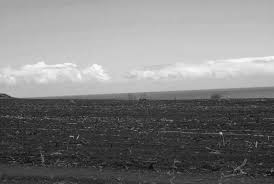

Gaussian Blur: PSNR=32.23, SSIM=0.84


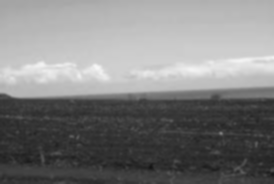

Saved Gaussian Blur as gaussian_blur.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Median Filtering: PSNR=30.54, SSIM=0.76


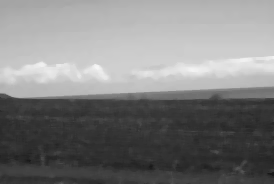

Saved Median Filtering as median_filtered.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Bilateral Filtering: PSNR=30.24, SSIM=0.74


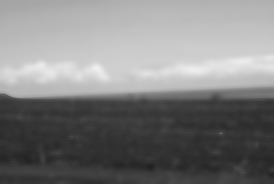

Saved Bilateral Filtering as bilateral_filtered.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Non-Local Means Denoising: PSNR=29.12, SSIM=0.68


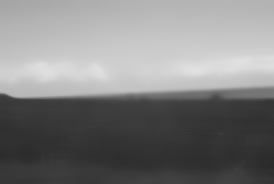

Saved Non-Local Means Denoising as nlm_denoised.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
import cv2
import numpy as np
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
from google.colab import files

# Function to calculate and print noise metrics
def print_noise_metrics(original, processed, method_name):
    psnr = peak_signal_noise_ratio(original, processed)
    ssim = structural_similarity(original, processed)
    print(f"{method_name}: PSNR={psnr:.2f}, SSIM={ssim:.2f}")

# Function to display and save images
def display_and_save_image(image, title, filename):
    cv2_imshow(image)
    cv2.imwrite(filename, image)
    print(f"Saved {title} as {filename}")
    files.download(filename)

# Display the original image
print("Original Image:")
cv2_imshow(gray)

# Gaussian Blur
gaussian_blur = cv2.GaussianBlur(gray, (5, 5), 0)
print_noise_metrics(gray, gaussian_blur, "Gaussian Blur")
display_and_save_image(gaussian_blur, "Gaussian Blur", "gaussian_blur.jpg")

# Median Filtering
median_filtered = cv2.medianBlur(gray, 5)
print_noise_metrics(gray, median_filtered, "Median Filtering")
display_and_save_image(median_filtered, "Median Filtering", "median_filtered.jpg")

# Bilateral Filtering
bilateral_filtered = cv2.bilateralFilter(gray, 9, 75, 75)
print_noise_metrics(gray, bilateral_filtered, "Bilateral Filtering")
display_and_save_image(bilateral_filtered, "Bilateral Filtering", "bilateral_filtered.jpg")

# Non-Local Means Denoising
nlm_denoised = cv2.fastNlMeansDenoising(gray, None, 30, 7, 21)
print_noise_metrics(gray, nlm_denoised, "Non-Local Means Denoising")
display_and_save_image(nlm_denoised, "Non-Local Means Denoising", "nlm_denoised.jpg")


Original Image:


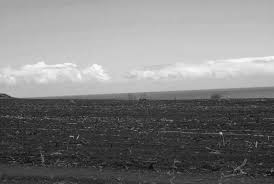

Gaussian Blur: PSNR=32.23, SSIM=0.84
Median Filtering: PSNR=30.54, SSIM=0.76
Bilateral Filtering: PSNR=30.24, SSIM=0.74
Non-Local Means Denoising: PSNR=29.12, SSIM=0.68


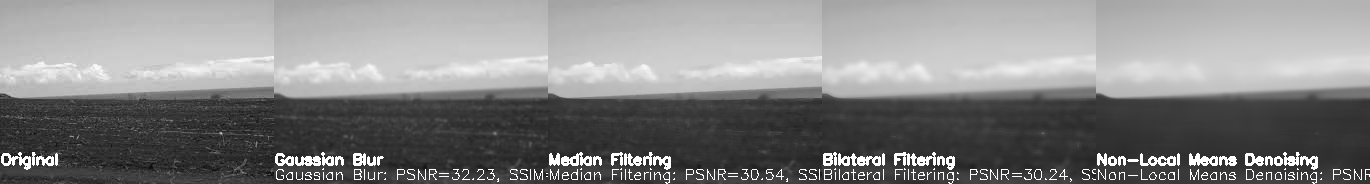

Saved concatenated image as processed_images.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
import cv2
import numpy as np
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
from google.colab import files

# Function to calculate and print noise metrics
def print_noise_metrics(original, processed, method_name):
    psnr = peak_signal_noise_ratio(original, processed)
    ssim = structural_similarity(original, processed)
    print(f"{method_name}: PSNR={psnr:.2f}, SSIM={ssim:.2f}")
    return f"{method_name}: PSNR={psnr:.2f}, SSIM={ssim:.2f}"

# Concatenate images horizontally with labels and info
def concatenate_images_horizontally(images, labels, infos):
    max_height = max(image.shape[0] for image in images)
    total_width = sum(image.shape[1] for image in images)
    concatenated_image = np.zeros((max_height, total_width), dtype=np.uint8)

    current_width = 0
    for image, label, info in zip(images, labels, infos):
        height, width = image.shape[:2]
        concatenated_image[:height, current_width:current_width+width] = image
        cv2.putText(concatenated_image, label, (current_width, max_height - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, 255, 2)
        cv2.putText(concatenated_image, info, (current_width, max_height - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, 255, 1)
        current_width += width

    return concatenated_image

# Display the original image
print("Original Image:")
cv2_imshow(gray)

# Gaussian Blur
gaussian_blur = cv2.GaussianBlur(gray, (5, 5), 0)
gaussian_blur_info = print_noise_metrics(gray, gaussian_blur, "Gaussian Blur")

# Median Filtering
median_filtered = cv2.medianBlur(gray, 5)
median_filtered_info = print_noise_metrics(gray, median_filtered, "Median Filtering")

# Bilateral Filtering
bilateral_filtered = cv2.bilateralFilter(gray, 9, 75, 75)
bilateral_filtered_info = print_noise_metrics(gray, bilateral_filtered, "Bilateral Filtering")

# Non-Local Means Denoising
nlm_denoised = cv2.fastNlMeansDenoising(gray, None, 30, 7, 21)
nlm_denoised_info = print_noise_metrics(gray, nlm_denoised, "Non-Local Means Denoising")

# Concatenate images horizontally
concatenated_image = concatenate_images_horizontally([gray, gaussian_blur, median_filtered, bilateral_filtered, nlm_denoised],
                                                     ["Original", "Gaussian Blur", "Median Filtering", "Bilateral Filtering", "Non-Local Means Denoising"],
                                                     ["", gaussian_blur_info, median_filtered_info, bilateral_filtered_info, nlm_denoised_info])

# Display and save the concatenated image
cv2_imshow(concatenated_image)
cv2.imwrite("processed_images.jpg", concatenated_image)
print("Saved concatenated image as processed_images.jpg")
files.download("processed_images.jpg")


In [29]:
import cv2
import numpy as np
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

def evaluate_image_quality(original, denoised):
    psnr = peak_signal_noise_ratio(original, denoised)
    ssim = structural_similarity(original, denoised)
    return psnr, ssim

def apply_denoising_techniques(image, method, params):
    if method == 'nlm':
        h, template_window_size, search_window_size = params
        return cv2.fastNlMeansDenoising(image, None, h, template_window_size, search_window_size)
    elif method == 'gaussian':
        ksize, sigma = params
        return cv2.GaussianBlur(image, (ksize, ksize), sigma)
    elif method == 'median':
        ksize = params[0]
        return cv2.medianBlur(image, ksize)
    elif method == 'bilateral':
        d, sigma_color, sigma_space = params
        return cv2.bilateralFilter(image, d, sigma_color, sigma_space)

def find_best_parameters(image, method):
    best_psnr = 0
    best_ssim = 0
    best_params = None

    if method == 'nlm':
        h_values = range(10, 35, 5)
        template_window_sizes = range(3, 8, 2)
        search_window_sizes = range(15, 36, 5)
        for h in h_values:
            for template_window_size in template_window_sizes:
                for search_window_size in search_window_sizes:
                    denoised = apply_denoising_techniques(image, method, (h, template_window_size, search_window_size))
                    psnr, ssim = evaluate_image_quality(image, denoised)
                    if psnr > best_psnr and ssim > best_ssim:
                        best_psnr = psnr
                        best_ssim = ssim
                        best_params = (h, template_window_size, search_window_size)

    elif method == 'gaussian':
        ksize_values = range(3, 16, 2)
        sigma_values = range(1, 11)
        for ksize in ksize_values:
            for sigma in sigma_values:
                denoised = apply_denoising_techniques(image, method, (ksize, sigma))
                psnr, ssim = evaluate_image_quality(image, denoised)
                if psnr > best_psnr and ssim > best_ssim:
                    best_psnr = psnr
                    best_ssim = ssim
                    best_params = (ksize, sigma)

    elif method == 'median':
        ksize_values = range(3, 16, 2)
        for ksize in ksize_values:
            denoised = apply_denoising_techniques(image, method, (ksize,))
            psnr, ssim = evaluate_image_quality(image, denoised)
            if psnr > best_psnr and ssim > best_ssim:
                best_psnr = psnr
                best_ssim = ssim
                best_params = (ksize,)

    elif method == 'bilateral':
        d_values = range(5, 10)
        sigma_color_values = range(25, 101, 25)
        sigma_space_values = range(25, 101, 25)
        for d in d_values:
            for sigma_color in sigma_color_values:
                for sigma_space in sigma_space_values:
                    denoised = apply_denoising_techniques(image, method, (d, sigma_color, sigma_space))
                    psnr, ssim = evaluate_image_quality(image, denoised)
                    if psnr > best_psnr and ssim > best_ssim:
                        best_psnr = psnr
                        best_ssim = ssim
                        best_params = (d, sigma_color, sigma_space)

    return best_params, best_psnr, best_ssim

# Read the grayscale image
# gray_image = cv2.imread('path_to_gray_image', cv2.IMREAD_GRAYSCALE)

# List of denoising methods to compare
methods = ['nlm', 'gaussian', 'median', 'bilateral']

best_method = None
best_overall_psnr = 0
best_overall_ssim = 0
best_overall_params = None

# Evaluate each method
for method in methods:
    best_params, best_psnr, best_ssim = find_best_parameters(gray, method)
    print(f"Best Parameters for {method}: {best_params}")
    print(f"Best PSNR for {method}: {best_psnr}")
    print(f"Best SSIM for {method}: {best_ssim}")

    if best_psnr > best_overall_psnr and best_ssim > best_overall_ssim:
        best_overall_psnr = best_psnr
        best_overall_ssim = best_ssim
        best_overall_params = best_params
        best_method = method

print(f"\nBest Denoising Method: {best_method}")
print(f"Best Parameters: {best_overall_params}")
print(f"Best PSNR: {best_overall_psnr}")
print(f"Best SSIM: {best_overall_ssim}")

# Apply the best denoising technique
best_denoised_image = apply_denoising_techniques(gray, best_method, best_overall_params)
cv2.imwrite('best_denoised_image.jpg', best_denoised_image)


Best Parameters for nlm: (10, 3, 15)
Best PSNR for nlm: 34.52332279389776
Best SSIM for nlm: 0.8830444974000277
Best Parameters for gaussian: (3, 1)
Best PSNR for gaussian: 33.30493181123512
Best SSIM for gaussian: 0.8830076611392623
Best Parameters for median: (3,)
Best PSNR for median: 32.034383749734474
Best SSIM for median: 0.8389180803639459
Best Parameters for bilateral: (5, 25, 25)
Best PSNR for bilateral: 34.483449896634525
Best SSIM for bilateral: 0.8911469189723417

Best Denoising Method: nlm
Best Parameters: (10, 3, 15)
Best PSNR: 34.52332279389776
Best SSIM: 0.8830444974000277


True



---comparing glcm prop after applying threshold



In [ ]:


#  'image' is your input image

# Step 1: Convert to grayscale
#already converted

# Step 2: Apply thresholding
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# Step 3: Find contours
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Step 4: Get the largest contour (assuming it is the soil region)
largest_contour = max(contours, key=cv2.contourArea)

# Step 5: Get the bounding box of the largest contour
x, y, w, h = cv2.boundingRect(largest_contour)

# Step 6: Crop the image using the bounding box
cropped_image = image[y:y+h, x:x+w]

# Plotting
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(image)  # Convert BGR to RGB for display
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(binary, cmap='gray')
plt.title("Binary Image")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(gray, cmap='gray')
plt.title("Gray Image without Crop")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(cropped_image, cmap='gray')
plt.title("Gray Image after Crop")
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
cropped_image_uint = cropped_image.astype(np.uint8)

In [ ]:
##comparing glcm properties of cropped and without cropped image


# Calculate GLCM properties for the cropped image
glcm_cropped = greycomatrix(cropped_image_uint, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
props_cropped = {'contrast': greycoprops(glcm_cropped, 'contrast')[0, 0],
                 'correlation': greycoprops(glcm_cropped, 'correlation')[0, 0],
                 'energy': greycoprops(glcm_cropped, 'energy')[0, 0],
                 'homogeneity': greycoprops(glcm_cropped, 'homogeneity')[0, 0]}

# Calculate GLCM properties for the original gray image
glcm_gray = greycomatrix(gray, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
props_gray = {'contrast': greycoprops(glcm_gray, 'contrast')[0, 0],
              'correlation': greycoprops(glcm_gray, 'correlation')[0, 0],
              'energy': greycoprops(glcm_gray, 'energy')[0, 0],
              'homogeneity': greycoprops(glcm_gray, 'homogeneity')[0, 0]}

# Compare the GLCM properties
print("GLCM Properties Comparison:")
print("Cropped Image:")
print("Contrast:", props_cropped['contrast'])
print("Correlation:", props_cropped['correlation'])
print("Energy:", props_cropped['energy'])
print("Homogeneity:", props_cropped['homogeneity'])
print("\nOriginal Gray Image:")
print("Contrast:", props_gray['contrast'])
print("Correlation:", props_gray['correlation'])
print("Energy:", props_gray['energy'])
print("Homogeneity:", props_gray['homogeneity'])
